Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas.

## Nivell 1

### Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

https://www.kaggle.com/giovamata/airlinedelaycauses

### Exercici 2
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès

Troba quantes dades faltants hi ha per columna

Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

Taula de les aerolínies amb més endarreriments acumulats

Quins són els vols més llargs? 

I els més endarrerits?

Etc.
### Exercici 3
Exporta el data set net i amb les noves columnes a Excel

In [2]:
import pandas as pd
import numpy as np
Delayed=pd.read_csv('DelayedFlights.csv')
pd.options.display.max_rows=None
pd.options.display.max_columns=None
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
import datetime as dt

In [3]:
Delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

This dataset is composed by the following variables:
* Year 2008
* Month 1-12
* DayofMonth 1-31
* DayOfWeek 1 (Monday) - 7 (Sunday)
* DepTime actual departure time (local, hhmm)
* CRSDepTime scheduled departure time (local, hhmm)
* ArrTime actual arrival time (local, hhmm)
* CRSArrTime scheduled arrival time (local, hhmm)
* UniqueCarrier unique carrier code
* FlightNum flight number
* TailNum plane tail number: aircraft registration, unique aircraft identifier
* ActualElapsedTime in minutes
* CRSElapsedTime in minutes
* AirTime in minutes
* ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
* DepDelay departure delay, in minutes
* Origin origin IATA airport code
* Dest destination IATA airport code
* Distance in miles
* TaxiIn taxi in time, in minutes
* TaxiOut taxi out time in minutes
* Cancelled *was the flight cancelled
* CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
* Diverted 1 = yes, 0 = no
* CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
* WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
* NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
* SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
* LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [4]:
Delayed.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
print(" Camps sense valor totalitzats per columna.")
Delayed.isnull().sum()

 Camps sense valor totalitzats per columna.


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
print("Amb la informació separada de dia, mes i any, creo un camp Data")
Delayed['Data']=pd.to_datetime(Delayed['Year'].astype('string')+'/'+Delayed['Month'].astype('string')+'/'+Delayed['DayofMonth'].astype('string'))

Amb la informació separada de dia, mes i any, creo un camp Data


In [7]:
Delayed['Data'].head()


0   2008-01-03
1   2008-01-03
2   2008-01-03
3   2008-01-03
4   2008-01-03
Name: Data, dtype: datetime64[ns]

In [8]:
Delayed.describe()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [9]:
Delayed.count()

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1247488
WeatherDelay         1247488
NASDelay             1247488
SecurityDelay        1247488
LateAircraftDelay    1247488
Data                 1936758
dtype: int64

In [10]:
Delayed.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Data                      0
dtype: int64

In [11]:
Delayed.isnull().sum().sum()

3486389

En total, al Dataframe tenim 3,4  milions de NaN

In [12]:
print("Presento la informació del dataframe només amb les columnes directament realcionades amb el retard del vol.")
Delayed.loc[:,['DepTime','CRSDepTime','ArrTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','TaxiIn','TaxiOut' ]].head(20)

Presento la informació del dataframe només amb les columnes directament realcionades amb el retard del vol.


,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,4.0,8.0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,5.0,10.0
2,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,3.0,17.0
3,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,3.0,10.0
4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,4.0,10.0
5,1937.0,1830,2037.0,1940,240.0,250.0,230.0,57.0,67.0,3.0,7.0
6,706.0,700,916.0,915,130.0,135.0,106.0,1.0,6.0,5.0,19.0
7,1644.0,1510,1845.0,1725,121.0,135.0,107.0,80.0,94.0,6.0,8.0
8,1029.0,1020,1021.0,1010,52.0,50.0,37.0,11.0,9.0,6.0,9.0
9,1452.0,1425,1640.0,1625,228.0,240.0,213.0,15.0,27.0,7.0,8.0


In [13]:
print("Calculo per cada vol el retard del mateix, respecte a la previsió.")
Delayed['Retard']=Delayed['CarrierDelay']+Delayed['WeatherDelay']+Delayed['NASDelay']+Delayed['SecurityDelay']+Delayed['LateAircraftDelay']


Calculo per cada vol el retard del mateix, respecte a la previsió.


In [14]:
Delayed.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,34.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN


In [15]:
Delayed[Delayed['ArrDelay']>0].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,34.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,2008-01-03,57.0


In [16]:
Delayed[Delayed['AirTime'].isna()].count()

Unnamed: 0           8387
Year                 8387
Month                8387
DayofMonth           8387
DayOfWeek            8387
DepTime              8387
CRSDepTime           8387
ArrTime              1277
CRSArrTime           8387
UniqueCarrier        8387
FlightNum            8387
TailNum              8385
ActualElapsedTime       0
CRSElapsedTime       8189
AirTime                 0
ArrDelay                0
DepDelay             8387
Origin               8387
Dest                 8387
Distance             8387
TaxiIn               1277
TaxiOut              7932
Cancelled            8387
CancellationCode     8387
Diverted             8387
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
Data                 8387
Retard                  0
dtype: int64

In [17]:
print("Creo la columna per la velocitat mitjana, a partir dels valor de la distància de vol, i el temps que l'avió ha estat enlairat.")
Delayed['VelMitja']=Delayed['Distance']/Delayed['AirTime']*60

Creo la columna per la velocitat mitjana, a partir dels valor de la distància de vol, i el temps que l'avió ha estat enlairat.


In [18]:
Delayed[(Delayed['VelMitja'].isna())].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
1280,1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,NaN,95.0,NaN,NaN,7.0,SAN,SMF,480,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,NaN
1372,1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,NaN,90.0,NaN,NaN,265.0,SFO,SAN,447,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,NaN
1776,2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,NaN,65.0,NaN,NaN,44.0,BOI,RNO,335,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN
1831,2726,2008,1,4,5,737.0,705,NaN,825,WN,178,N718SW,NaN,80.0,NaN,NaN,32.0,BUR,SMF,358,NaN,13.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN
2244,3672,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,NaN,85.0,NaN,NaN,139.0,LAS,RNO,345,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN


In [19]:
Delayed.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,418.965517
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,430.088496
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,406.578947
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,34.0,401.298701
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,474.482759


In [20]:
Delayed[(Delayed['VelMitja'].isna())].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
1280,1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,NaN,95.0,NaN,NaN,7.0,SAN,SMF,480,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,NaN
1372,1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,NaN,90.0,NaN,NaN,265.0,SFO,SAN,447,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,NaN
1776,2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,NaN,65.0,NaN,NaN,44.0,BOI,RNO,335,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN
1831,2726,2008,1,4,5,737.0,705,NaN,825,WN,178,N718SW,NaN,80.0,NaN,NaN,32.0,BUR,SMF,358,NaN,13.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN
2244,3672,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,NaN,85.0,NaN,NaN,139.0,LAS,RNO,345,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-01-04,NaN,NaN


In [21]:
Delayed[Delayed['ArrDelay']>0].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,430.088496
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,406.578947
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,34.0,401.298701
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,474.482759
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,2008-01-03,57.0,415.043478


In [22]:
Delayed_01=Delayed.dropna()



In [23]:
Delayed_01.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Data                 0
Retard               0
VelMitja             0
dtype: int64

In [24]:
Delayed_01.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 3 to 1936755
Data columns (total 33 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Unnamed: 0         1247486 non-null  int64         
 1   Year               1247486 non-null  int64         
 2   Month              1247486 non-null  int64         
 3   DayofMonth         1247486 non-null  int64         
 4   DayOfWeek          1247486 non-null  int64         
 5   DepTime            1247486 non-null  float64       
 6   CRSDepTime         1247486 non-null  int64         
 7   ArrTime            1247486 non-null  float64       
 8   CRSArrTime         1247486 non-null  int64         
 9   UniqueCarrier      1247486 non-null  object        
 10  FlightNum          1247486 non-null  int64         
 11  TailNum            1247486 non-null  object        
 12  ActualElapsedTime  1247486 non-null  float64       
 13  CRSElapsedTime     1247486 

In [25]:
print("Els cinc vols amb un endarreriment major són:")
Delayed_01.sort_values(by='Retard',ascending=False).head(5)

Els cinc vols amb un endarreriment major són:


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
322516,1018798,2008,2,3,7,1117.0,1820,2256.0,555,NW,808,N817NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,6.0,16.0,0,N,0,1455.0,0.0,4.0,0.0,1002.0,2008-02-03,2461.0,545.354691
686014,2235378,2008,4,10,4,724.0,1417,858.0,1605,NW,1699,N3324L,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,8.0,14.0,0,N,0,2436.0,0.0,0.0,0.0,17.0,2008-04-10,2453.0,422.727273
839306,2832617,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,0,N,0,1951.0,0.0,0.0,0.0,0.0,2008-05-06,1951.0,448.965517
1009553,3387883,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0,2008-06-20,1707.0,364.800000
1881639,6857047,2008,12,19,5,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,0,N,0,1307.0,0.0,58.0,0.0,290.0,2008-12-19,1655.0,351.250000


# Retard Anglès (si no ets o'clock, estas endarrerit)

In [26]:
TotalVols=len(Delayed)
print("El total de vols registrats és",format(TotalVols,'>7,.0f'),"durant l'any.")
VolsEndarrerits=len(Delayed[Delayed['ArrDelay']>0])
print("En total hi han :",format(VolsEndarrerits,'>7,.0f')," vols que no han arribat a l'hora prevista.")
print("Això representa "+str(format(VolsEndarrerits/TotalVols*100,'.2f'))+"% dels vols.")
VolsOfiEndarrerits=len(Delayed[Delayed['Retard']>0])
print("Però oficialment només són "+str(format(VolsOfiEndarrerits,'>7,.0f'))+" els que han superat els 15 minuts d'endarreriment, que són els oficialment amb retard.")
print("Això millora la ratio, deixant-la en un "+str(format(VolsOfiEndarrerits/TotalVols*100,'.2f'))+"% els vols endarrerits sobre el total.")
VolsTardNoOfiEndarrerits=len(Delayed[(Delayed['Retard'].isnull())&(Delayed['ArrDelay']>0)])
print("Els vols que no es consideren endarrerits, però que tampoc han arribat a l'hora prevista són",format(VolsTardNoOfiEndarrerits,'>7,.0f'),".")

El total de vols registrats és 1,936,758 durant l'any.
En total hi han : 1,723,415  vols que no han arribat a l'hora prevista.
Això representa 88.98% dels vols.
Però oficialment només són 1,247,488 els que han superat els 15 minuts d'endarreriment, que són els oficialment amb retard.
Això millora la ratio, deixant-la en un 64.41% els vols endarrerits sobre el total.
Els vols que no es consideren endarrerits, però que tampoc han arribat a l'hora prevista són 475,927 .


In [27]:
Delayed[Delayed['Cancelled']>0].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
1542406,5463024,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,N601WN,NaN,60.0,NaN,NaN,122.0,HOU,HRL,276,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-10-27,NaN,NaN
1546593,5484245,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,N26549,NaN,107.0,NaN,NaN,28.0,CLT,EWR,529,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-25,NaN,NaN
1547161,5486876,2008,10,22,3,1825.0,1815,NaN,1927,XE,2819,N12946,NaN,72.0,NaN,NaN,10.0,JAN,IAH,351,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,2008-10-22,NaN,NaN
1547178,5486924,2008,10,22,3,1733.0,1715,NaN,1818,XE,2890,N16944,NaN,63.0,NaN,NaN,18.0,IAH,BTR,253,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-22,NaN,NaN
1548271,5491819,2008,10,15,3,1943.0,1745,NaN,1857,XE,2117,N26545,NaN,72.0,NaN,NaN,118.0,IAH,HRL,295,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-15,NaN,NaN


## Vols cancel·lats

In [28]:
VolsCancel=len(Delayed[Delayed['Cancelled']==1])
QuasiVols=len(Delayed[(Delayed['Cancelled']>0)&(Delayed['TaxiOut']>0)])
print("Del total de vols,només van ser cancel·lats "+str(VolsCancel)+" ,i d'aquests,un total de "+str(QuasiVols)+" van ser cancel·lats quan ja havien sortit a pista.")
print("El percentatge de vols cancel·lats és "+str(format(VolsCancel/TotalVols*100,'.2f'))+"%.")

Del total de vols,només van ser cancel·lats 633 ,i d'aquests,un total de 178 van ser cancel·lats quan ja havien sortit a pista.
El percentatge de vols cancel·lats és 0.03%.


Text(0, 0.5, 'Nº Vols')

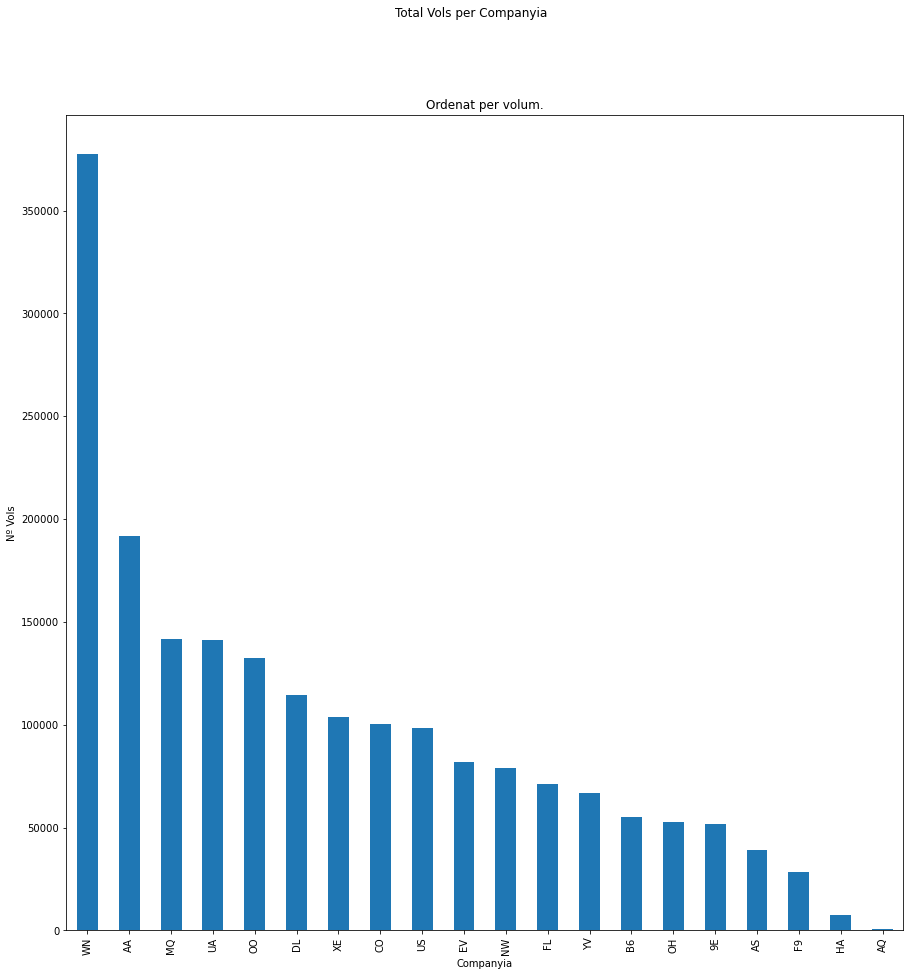

In [29]:
Delayed['UniqueCarrier'].value_counts().plot(kind='bar')
plt.suptitle('Total Vols per Companyia')
plt.title("Ordenat per volum.")
plt.xlabel("Companyia")
plt.ylabel("Nº Vols")

In [30]:
Avions=Delayed['TailNum'].value_counts()

In [31]:
(Avions)

N325SW    965
N676SW    951
N658SW    945
N313SW    937
N308SA    936
N641SW    931
N656SW    925
N347SW    910
N340LV    910
N612SW    901
N333SW    900
N350SW    896
N382SW    895
N331SW    889
N349SW    889
N683SW    888
N395SW    887
N663SW    877
N506SW    877
N398SW    869
N330SW    866
N329SW    865
N662SW    864
N611SW    863
N653SW    861
N692SW    861
N608SW    861
N388SW    860
N312SW    859
N365SW    858
N520SW    855
N688SW    855
N344SW    853
N675AA    851
N610WN    851
N660SW    850
N397SW    850
N619SW    849
N659SW    849
N77278    849
N649SW    848
N507SW    847
N768AS    847
N669SW    846
N300SW    846
N383SW    844
N318SW    844
N646SW    841
N370SW    841
N305SW    839
N304SW    837
N384SW    837
N328SW    832
N512SW    832
N390SW    830
N37342    830
N665WN    828
N502SW    828
N603SW    828
N605SW    827
N87353    827
N368SW    827
N699SW    827
N618WN    825
N326SW    825
N613SW    824
N691WN    824
N345SA    824
N651SW    823
N684WN    822
N503SW    821
N324SW

In [32]:
print('Llistat dels recorreguts més curts i més llarg per companyia , amb total de milles volades per la companyia:')
vols=Delayed.groupby('UniqueCarrier')['Distance'].agg([min,max,sum])
vols.sort_values(by='UniqueCarrier',ascending='True')


Llistat dels recorreguts més curts i més llarg per companyia , amb total de milles volades per la companyia:


,min,max,sum
UniqueCarrier,,,
9E,24,1680,24097833
AA,68,4243,207596776
AQ,76,2677,667403
AS,31,2846,37120232
B6,30,2704,61285558
CO,30,4962,124241354
DL,116,4502,110643100
EV,64,1134,37785755
F9,349,2406,25358373


In [33]:
print("El minuts de retard agrupats per companyia són:")
vols=Delayed.groupby('UniqueCarrier')['Retard'].agg([sum])
vols['HoresRetard']= vols['sum']/60
vols.rename(columns = {'sum':'Minuts'}, inplace = True) 
vols.sort_values(by='Minuts',ascending=False)

El minuts de retard agrupats per companyia són:


,Minuts,HoresRetard
UniqueCarrier,,
WN,10716672.0,178611.200000
AA,8696884.0,144948.066667
UA,6634029.0,110567.150000
MQ,6186339.0,103105.650000
OO,5763819.0,96063.650000
XE,5054931.0,84248.850000
DL,4396065.0,73267.750000
CO,3977547.0,66292.450000
EV,3775446.0,62924.100000


In [34]:
print('Llistat dels recorreguts més curts i més llarg per avio , amb total de milles volades per avió:')
vols=Delayed.groupby(['UniqueCarrier','TailNum'])['Distance'].agg([min,max,sum])
vols.sort_values(by=['UniqueCarrier','TailNum'],ascending=True)


Llistat dels recorreguts més curts i més llarg per avio , amb total de milles volades per avió:


min   max     sum
UniqueCarrier TailNum                    
9E            80009E     74   970  178752
              80019E     74  1031  159259
              80059E     56  1045  186231
              80129E     56  1139  192686
              80139E     56  1045  169809
              80199E     74  1395  165200
              80209E     74  1139  191221
              80219E     74  1139  197403
              80239E     74  1031  177715
              80249E     56  1005  148780
              80259E     56  1045  175383
              80269E     74  1139  197159
              80279E     56  1139  172899
              80299E     74  1092  168917
              80309E     74  1395  155723
              80319E     76   897   80628
              80329E    113  1139   94311
              80339E    120  1045   68874
              80349E     56  1139  109661
              80359E     56  1085   80370
              80369E     74  1139  110580
              80399E     95  1085  163548
              80409E     74  1048  123275
              80419E     56  1087  170218
              83909E     74  1045  121121
              84099E     76  1139  136543
              84129E     56  1045  173820
              84169E     56  1085  168423
              84239E     56  1139  180119
              84329E     56  1139  180801
              84449E     56  1031  160553
              84589E     56  1139  183653
              84759E     74  1139  177065
              84779E     74   986  193304
              84889E     74  1048  170905
              84929E     74  1048  181804
              84959E     56  1085  194164
              85019E     74  1031  171172
              85059E     74  1139  159047
              85069E     74  1139  168743
              85159E     74  1045  161417
              85169E     56  1045  159496
              85249E     56  1139  162312
              85259E     76  1087  181748
              85329E     56  1139  178516
              85339E     74  1139  194791
              85419E     56  1031  151534
              85439E     74  1139  176658
              85549E     74   939  137962
              85609E     95  1139  168662
              85779E     56  1048  162411
              85809E     74  1139  190342
              85879E     56  1005  181343
              85889E     95  1395  166671
              85989E     56  1139  160416
              86049E     56  1139  156932
              86119E     74  1139  162597
              86239E     74  1139  172602
              86319E     74   970  175061
              86469E     74  1139  165266
              86599E     56  1139  177558
              86659E     74  1031  174297
              86729E     56  1139  179886
              86739E     74  1048  139976
              86749E     56  1139  194497
              86839E     74  1092  159537
              86889E     56  1139  170482
              86949E     56  1194  167234
              86969E     56  1136  149374
              86989E     74  1048  137452
              87099E     56  1087  151717
              87109E     74  1139  173005
              87189E     56  1031  169377
              87219E     56  1092  173156
              87339E     74  1139  185106
              87369E     74  1139  194510
              87459E     56  1139  150270
              87479E     56  1092  174437
              87519E     56  1048  151819
              87589E     74  1139  164936
              87719E     74  1139  169985
              87759E     56  1045  174454
              87839E     74  1031  146039
              87909E     56  1139  166464
              87949E     74  1139  179046
              87979E     56  1139  166367
              88009E     74  1139  169429
              88089E     74  1139  174046
              88289E     56  1139  182737
              88369E     56  1031  164968
              88379E     56  1031  158624
              88399E     56  1085  161237
              88479E     74  1139  159787
              88559E     56  1031 

In [35]:
AeroSortida=Delayed['Origin'].value_counts()
AeroArribad=Delayed['Dest'].value_counts()
Companyies=Delayed['UniqueCarrier'].value_counts()

In [36]:
print('En el llistat hi ha dades de '+str(len(Avions))+' avions diferents.')
print('En el llistat hi ha dades de '+str(len(Companyies))+' Companyies diferents.')
print('En el llistat hi ha dades de '+str(len(AeroSortida))+' Aeroports de sortida diferents.')
print('En el llistat hi ha dades de '+str(len(AeroArribad))+' Aeroports arribada diferents.')

En el llistat hi ha dades de 5366 avions diferents.
En el llistat hi ha dades de 20 Companyies diferents.
En el llistat hi ha dades de 303 Aeroports de sortida diferents.
En el llistat hi ha dades de 304 Aeroports arribada diferents.


In [37]:
print("Total de sortides per aeroport durant l'any:")
AeroSortida

Total de sortides per aeroport durant l'any:


ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
SFO     43801
MCO     36139
CLT     35055
JFK     34706
MSP     32436
LGA     31185
SEA     31060
BWI     30710
PHL     30316
MDW     29222
SLC     28675
BOS     28196
SAN     24828
CVG     23881
MIA     23273
IAD     22125
TPA     20199
HOU     19639
FLL     19363
DAL     18710
MEM     18121
DCA     17725
STL     17328
OAK     17031
BNA     16496
CLE     16398
MCI     16022
RDU     15383
PDX     13791
SMF     13644
SJC     13082
MKE     11876
AUS     11843
SNA     11554
SAT     10902
PIT     10799
ABQ     10674
MSY     10498
IND      9710
HNL      8666
ONT      8646
CMH      8394
JAX      7933
PBI      7684
BUR      7259
BUF      6777
RSW      6602
BDL      6496
OMA      6423
RNO      6146
OKC      6114
BHM      6068
SJU      5918
SDF      5786
PVD      5694
TUL      5600
TUS      5531
ANC      5140
ELP      4828
RIC      4784
MHT      4686
LIT   

In [38]:
print("Total d'arribades per aeroport durant l'any:")
AeroArribad

Total d'arribades per aeroport durant l'any:


ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
EWR     55861
LAS     48858
PHX     47836
SFO     46876
IAH     43905
LGA     38137
MCO     36405
JFK     35506
DTW     34777
BOS     31961
SEA     31548
PHL     30795
BWI     29610
SLC     29217
MSP     28137
CLT     26898
SAN     26621
MDW     25318
IAD     22748
TPA     22665
FLL     20323
CVG     20056
DCA     19735
MIA     19706
STL     18582
OAK     18302
MCI     18205
CLE     17991
HOU     17712
RDU     17378
BNA     17338
PDX     16300
SMF     16007
MEM     15626
SJC     15577
AUS     15538
DAL     15179
SAT     14533
PIT     12487
ABQ     12183
SNA     12101
IND     11769
MSY     11706
MKE     10930
CMH     10780
ONT     10231
HNL     10095
JAX      9586
BDL      8905
OMA      8472
PBI      8463
OKC      8241
BUR      8185
BUF      7973
TUL      7777
TUS      7499
SJU      7464
BHM      7425
RSW      7316
RNO      7282
PVD      7212
SDF      6966
ELP      6587
ANC      6291
MHT      6010
RIC      5892
LIT   

In [39]:
VolsDiaris=Delayed['Data'].value_counts()

Gràfic de vols diaris durant l'any.


<AxesSubplot:>

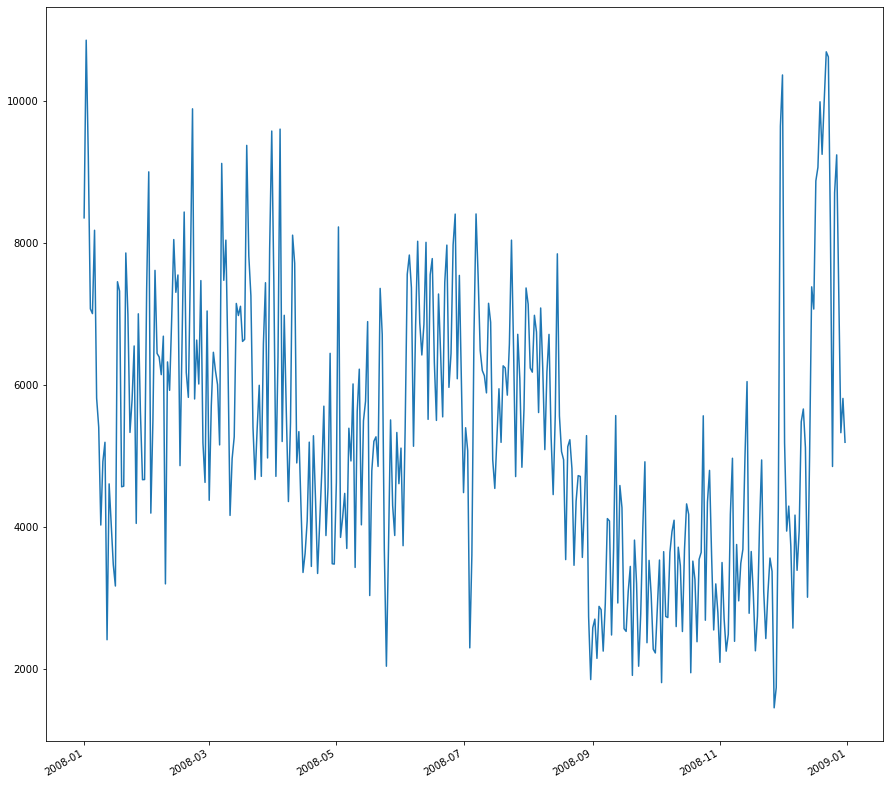

In [40]:
print("Gràfic de vols diaris durant l'any.")
VolsDiaris.plot()


In [41]:
VolsDiaris

2008-01-02    10857
2008-12-22    10693
2008-12-23    10621
2008-12-01    10367
2008-12-21     9994
2008-12-19     9989
2008-02-22     9890
2008-11-30     9646
2008-04-04     9604
2008-03-31     9577
2008-03-19     9375
2008-12-20     9249
2008-12-27     9241
2008-01-03     9225
2008-03-07     9121
2008-12-18     9066
2008-02-01     9002
2008-12-17     8874
2008-12-26     8707
2008-02-18     8436
2008-07-07     8409
2008-06-27     8407
2008-01-01     8354
2008-05-02     8226
2008-01-06     8179
2008-12-24     8169
2008-04-10     8110
2008-02-13     8048
2008-03-09     8040
2008-07-24     8040
2008-06-09     8024
2008-06-13     8009
2008-06-26     7973
2008-06-23     7970
2008-03-30     7921
2008-01-21     7859
2008-08-15     7847
2008-06-05     7830
2008-03-20     7818
2008-06-16     7780
2008-04-11     7714
2008-02-21     7662
2008-02-04     7614
2008-06-04     7559
2008-06-15     7552
2008-02-15     7549
2008-06-29     7543
2008-07-08     7532
2008-03-08     7474
2008-02-26     7470


In [42]:
DistanciaTotal=Delayed['Distance'].sum()
print('El total de milles volades per tots els avions és de '+str(format(DistanciaTotal,'>12,.0f'))+" milles")
print('Això vol dir que la distància mitjana recorreguda per cada avió és '+str((DistanciaTotal/len(Avions)).astype('int'))+' milles.')

El total de milles volades per tots els avions és de 1,482,948,794 milles
Això vol dir que la distància mitjana recorreguda per cada avió és 276360 milles.


In [43]:
print("Si mirem la informació estadística de la columna 'Distància' tenim els seguents valors")
Delayed['Distance'].describe().astype('int')


Si mirem la informació estadística de la columna 'Distància' tenim els seguents valors


count    1936758
mean         765
std          574
min           11
25%          338
50%          606
75%          998
max         4962
Name: Distance, dtype: int32

In [44]:
print("On podem veure que la distància mitja de vol és "+str(Delayed['Distance'].describe().astype('int')[1])+" milles.")

On podem veure que la distància mitja de vol és 765 milles.


In [45]:
MesLlarg=Delayed.sort_values(by='Distance',ascending=False)

In [46]:
print("El vol de major recorregut és el que uneix els següents aeroports:")
MesLlarg.iloc[0:1,17:19]

El vol de major recorregut és el que uneix els següents aeroports:


,Origin,Dest
1255581,HNL,EWR


In [47]:
Delayed['ArrDelay'].head()

0   -14.0
1     2.0
2    14.0
3    34.0
4    11.0
Name: ArrDelay, dtype: float64

<AxesSubplot:>

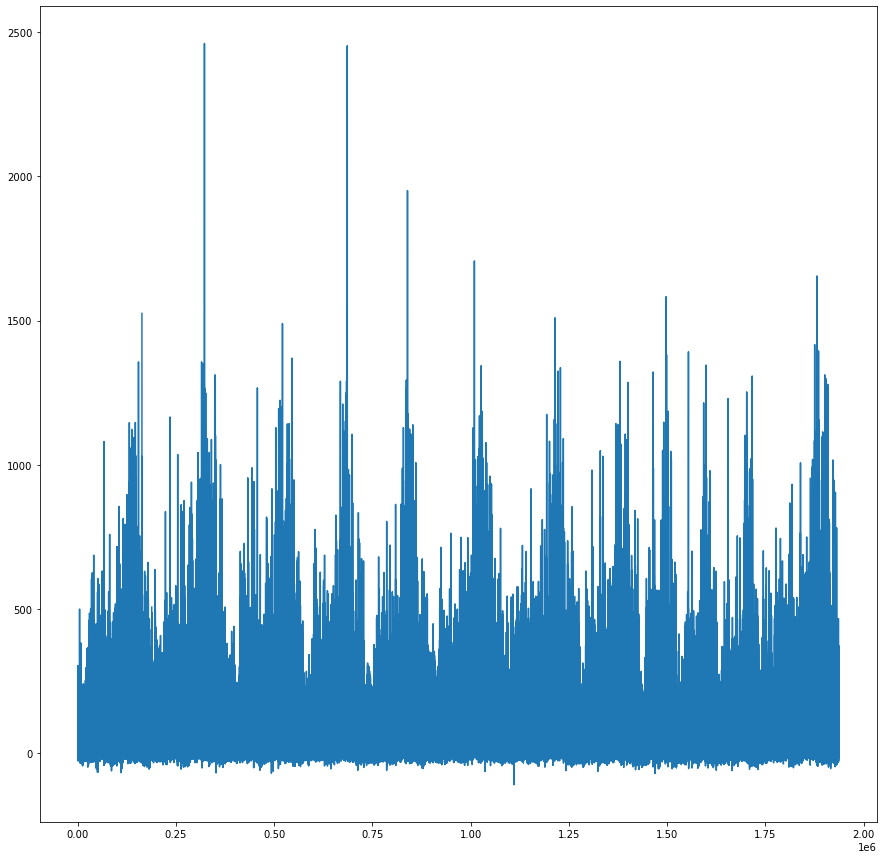

In [48]:
Delayed['ArrDelay'].plot()

Text(0, 0.5, 'Nº Vols')

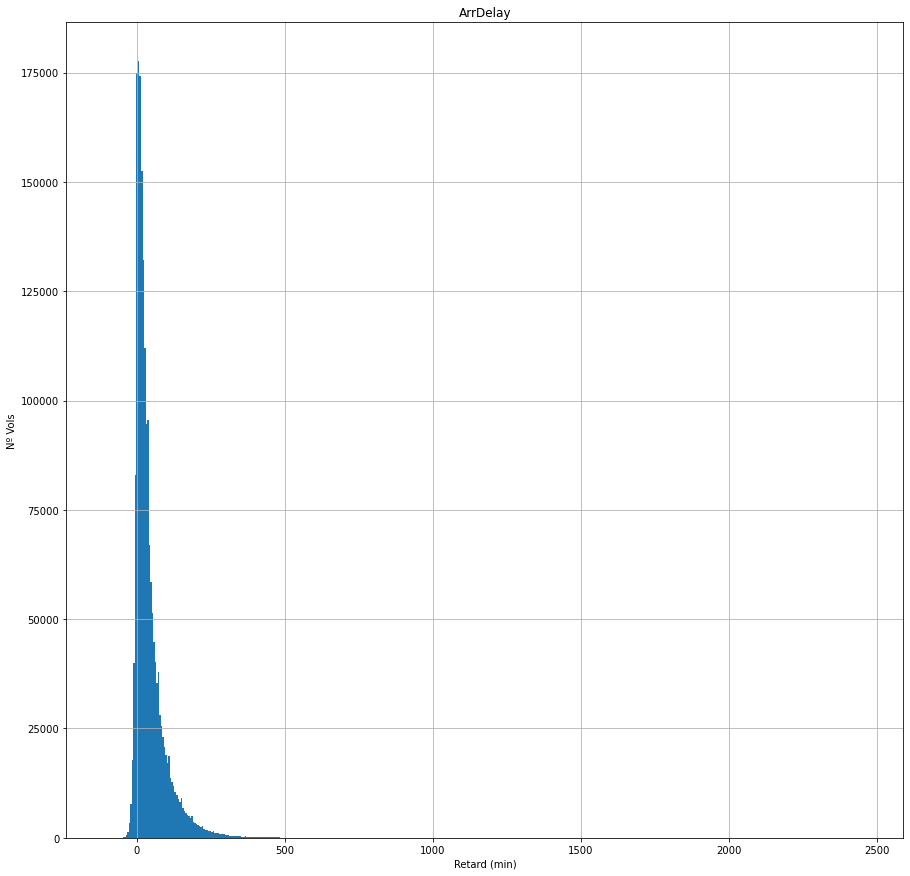

In [49]:
Delayed.hist(column='ArrDelay',bins=500)
plt.xlabel("Retard (min)")
plt.ylabel("Nº Vols")
#plt.hist(x)
#plt.show()

In [50]:
print("Resum estadistic de la columna ArrDelay en minuts.")
Delayed['ArrDelay'].describe().astype(int)

Resum estadistic de la columna ArrDelay en minuts.


count    1928371
mean          42
std           56
min         -109
25%            9
50%           24
75%           56
max         2461
Name: ArrDelay, dtype: int32

## Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
Diagrama de caixa de la distribucio de retards per companyia


In [51]:
RetardCia=Delayed_01.groupby(['UniqueCarrier'])

In [52]:
RetardCia.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Data,Retard,VelMitja
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,34.0,401.298701
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,2008-01-03,57.0,415.043478
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,2008-01-03,80.0,464.299065
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,2008-01-03,15.0,419.436620
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,2008-01-03,16.0,457.090909
30734,94057,2008,1,31,4,1920.0,1445,2223.0,1745,XE,2771,N12157,123.0,120.0,96.0,278.0,275.0,ABQ,IAH,744,6.0,21.0,0,N,0,0.0,0.0,3.0,0.0,275.0,2008-01-31,278.0,465.000000
30735,94059,2008,1,8,2,1711.0,1600,2031.0,1945,XE,1226,N14953,140.0,165.0,106.0,46.0,71.0,ORD,EWR,719,8.0,26.0,0,N,0,0.0,0.0,2.0,0.0,44.0,2008-01-08,46.0,406.981132
30736,94065,2008,1,2,3,1252.0,1223,1457.0,1428,XE,2667,N12967,125.0,125.0,101.0,29.0,29.0,MCI,IAH,643,12.0,12.0,0,N,0,6.0,0.0,0.0,0.0,23.0,2008-01-02,29.0,381.980198
30738,94068,2008,1,3,4,1937.0,1840,2050.0,2004,XE,2961,N12921,73.0,84.0,57.0,46.0,57.0,SYR,CLE,317,6.0,10.0,0,N,0,0.0,0.0,0.0,0.0,46.0,2008-01-03,46.0,333.684211
30739,94072,2008,1,2,3,1354.0,1230,1523.0,1345,XE,2796,N12564,89.0,75.0,54.0,98.0,84.0,CLE,SDF,304,8.0,27.0,0,N,0,84.0,0.0,14.0,0.0,0.0,2008-01-02,98.0,337.777778


9E          AxesSubplot(0.1,0.77069;0.173913x0.12931)
AA     AxesSubplot(0.308696,0.77069;0.173913x0.12931)
AQ     AxesSubplot(0.517391,0.77069;0.173913x0.12931)
AS     AxesSubplot(0.726087,0.77069;0.173913x0.12931)
B6         AxesSubplot(0.1,0.615517;0.173913x0.12931)
CO    AxesSubplot(0.308696,0.615517;0.173913x0.12931)
DL    AxesSubplot(0.517391,0.615517;0.173913x0.12931)
EV    AxesSubplot(0.726087,0.615517;0.173913x0.12931)
F9         AxesSubplot(0.1,0.460345;0.173913x0.12931)
FL    AxesSubplot(0.308696,0.460345;0.173913x0.12931)
HA    AxesSubplot(0.517391,0.460345;0.173913x0.12931)
MQ    AxesSubplot(0.726087,0.460345;0.173913x0.12931)
NW         AxesSubplot(0.1,0.305172;0.173913x0.12931)
OH    AxesSubplot(0.308696,0.305172;0.173913x0.12931)
OO    AxesSubplot(0.517391,0.305172;0.173913x0.12931)
UA    AxesSubplot(0.726087,0.305172;0.173913x0.12931)
US             AxesSubplot(0.1,0.15;0.173913x0.12931)
WN        AxesSubplot(0.308696,0.15;0.173913x0.12931)
XE        AxesSubplot(0.5173

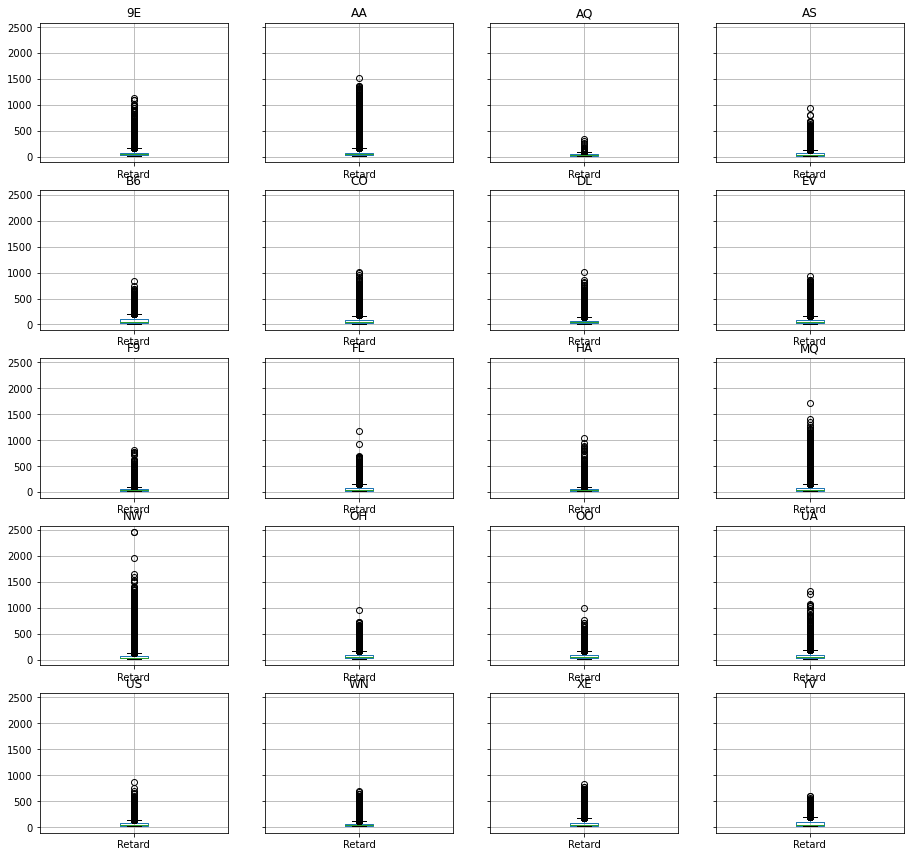

In [53]:

RetardCia.boxplot(column='Retard')


In [54]:
RR=Delayed_01.groupby(['UniqueCarrier']).sum()

In [55]:
RR

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Retard,VelMitja
UniqueCarrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
9E,116081766959,71545040,203832,545199,141881,53305603.0,50179786,56695030.0,55993482,152412820,3745207.0,3624836.0,2617841.0,2356828.0,2236457.0,16369223,310522.0,816844.0,0,0,908509.0,149270.0,391573.0,1553.0,905923.0,2356828.0,1.295955e+07
AA,445875213520,265572056,769863,2090554,521746,206879961.0,197510415,214088241.0,223023557,166087294,23059740.0,22443722.0,19172296.0,8696884.0,8080866.0,141367038,1112025.0,2775419.0,0,0,2821907.0,418677.0,2115126.0,6626.0,3334548.0,8696884.0,5.674891e+07
AQ,243858033,682720,450,3916,1534,510286.0,499042,538652.0,543567,96279,38406.0,38523.0,33965.0,14565.0,14684.0,253983,1526.0,2915.0,0,0,8342.0,589.0,195.0,89.0,5350.0,14565.0,1.207965e+05
AS,90894235410,48216096,155569,381746,95181,36507568.0,35124212,38357628.0,38896771,7573502,3627792.0,3562339.0,3066574.0,1360497.0,1295036.0,21838816,145189.0,416029.0,0,0,481815.0,47431.0,232822.0,7086.0,591343.0,1360497.0,9.792466e+06
B6,143132446489,76769856,243687,609882,154394,60724724.0,60345122,56960994.0,63776813,20645841,7017410.0,6795151.0,5679575.0,3005261.0,2783002.0,40880656,264421.0,1073414.0,0,0,676126.0,55219.0,978731.0,2093.0,1293092.0,3005261.0,1.561218e+07
CO,215480769784,118387664,365170,937040,228515,92065707.0,87883900,95045519.0,101797292,54497288,11719132.0,11482272.0,9560874.0,3977547.0,3740687.0,69900379,517408.0,1640850.0,0,0,996161.0,200282.0,1515500.0,11392.0,1254212.0,3977547.0,2.480068e+07
DL,276243775251,145082016,481558,1139023,296531,112004016.0,107623265,118124775.0,121432310,79150460,11941639.0,11451885.0,9389403.0,4396065.0,3906311.0,67020692,682921.0,1869315.0,0,0,1411220.0,167124.0,1216198.0,1365.0,1600158.0,4396065.0,2.944268e+07
EV,200945145890,114016248,363003,896630,229397,86542757.0,81376483,92158137.0,90286011,268295495,5682900.0,5535648.0,4128183.0,3775446.0,3628194.0,25840225,438612.0,1116105.0,0,0,1686899.0,565167.0,879783.0,3519.0,640078.0,3775446.0,2.067795e+07
F9,55497737011,32007520,100063,240783,65276,24739740.0,24222069,25444134.0,27683268,7987194,2401514.0,2319999.0,2000809.0,721346.0,639831.0,14375797,118267.0,282438.0,0,0,248286.0,21017.0,265336.0,391.0,186316.0,721346.0,6.839245e+06


## Una variable numèrica i una categorica

Text(0.5, 0, 'Companyia Aèria')

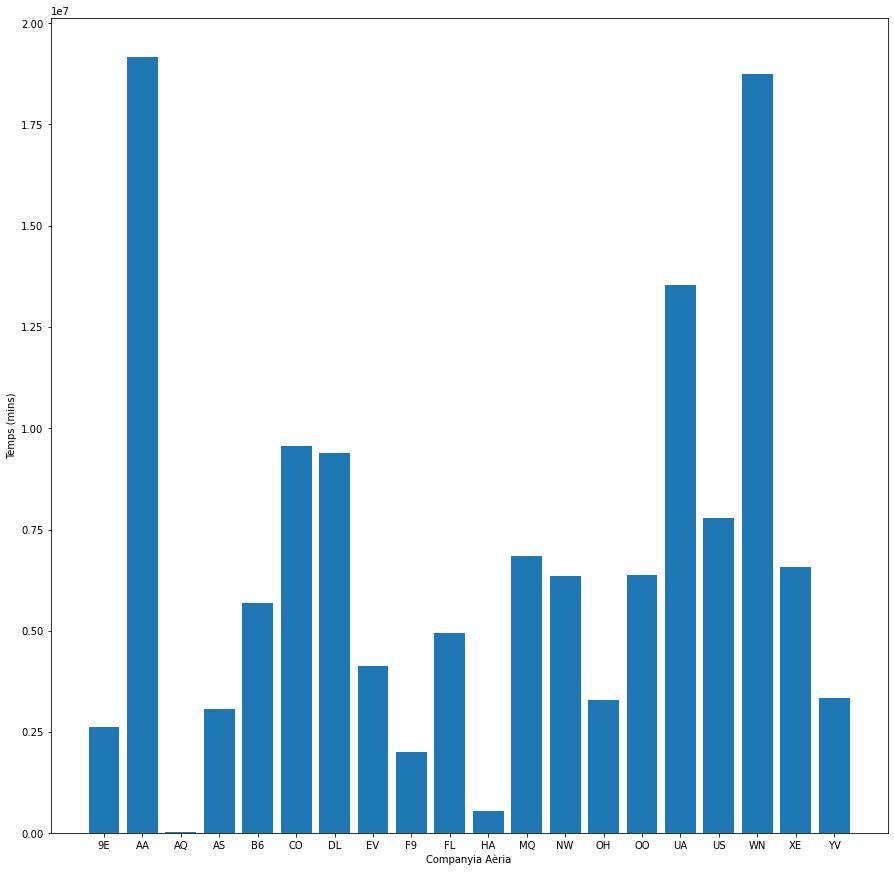

In [56]:
plt.bar(RR.index,RR['AirTime'])
plt.ylabel('Temps (mins)')
plt.xlabel('Companyia Aèria')

## Dues variables numèriques 'ArrDelay' i 'DepDelay'


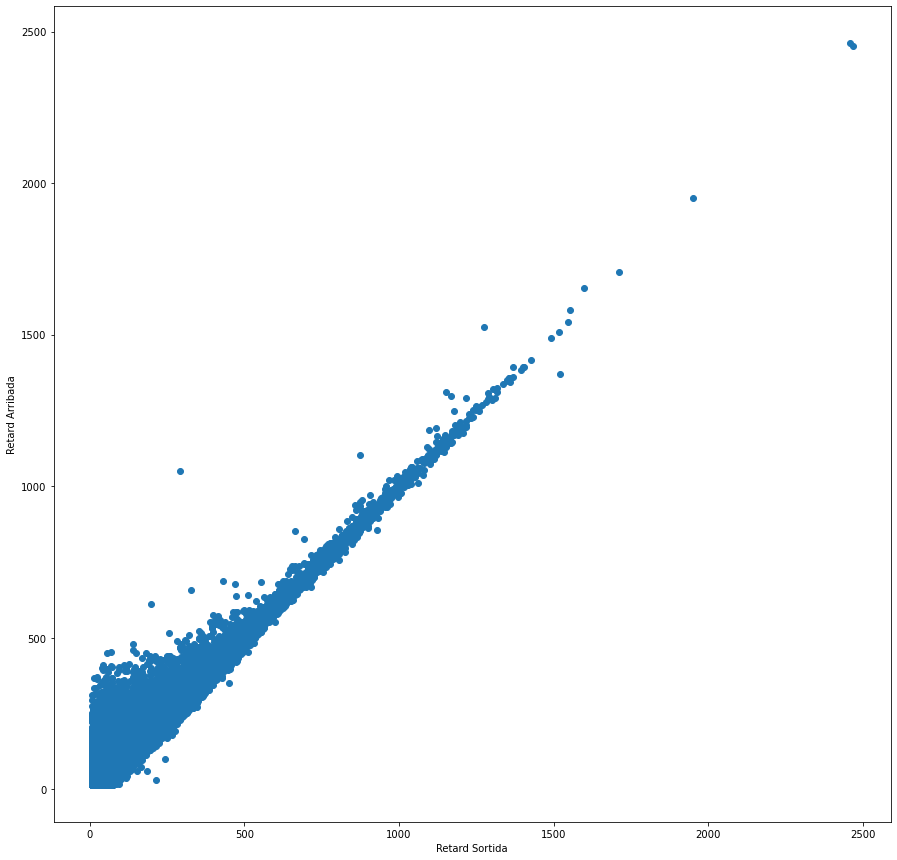

In [57]:
x=Delayed_01['ArrDelay']
y=Delayed_01['DepDelay']
plt.scatter(y,x)
plt.ylabel('Retard Arribada')
plt.xlabel('Retard Sortida')
plt.savefig("Plot_S04_T01_01.png")

## Una variable categòrica ('UniqueCarrier')

In [58]:
UQ=Delayed_01.groupby(['UniqueCarrier']).count()

In [59]:
etis=UQ.index

In [60]:
etis


Index(['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'],
      dtype='object', name='UniqueCarrier')

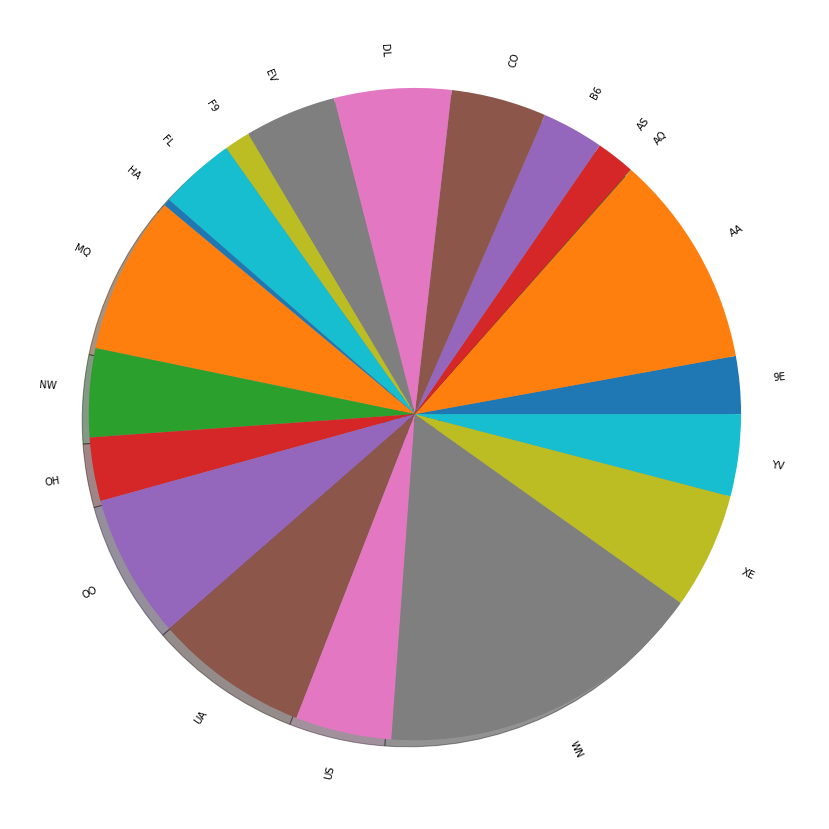

In [61]:
plt.pie(UQ['Year'],labels=etis,shadow=True,frame=False,rotatelabels=True)
plt.show()

## Dues variables numèriques i una categorica

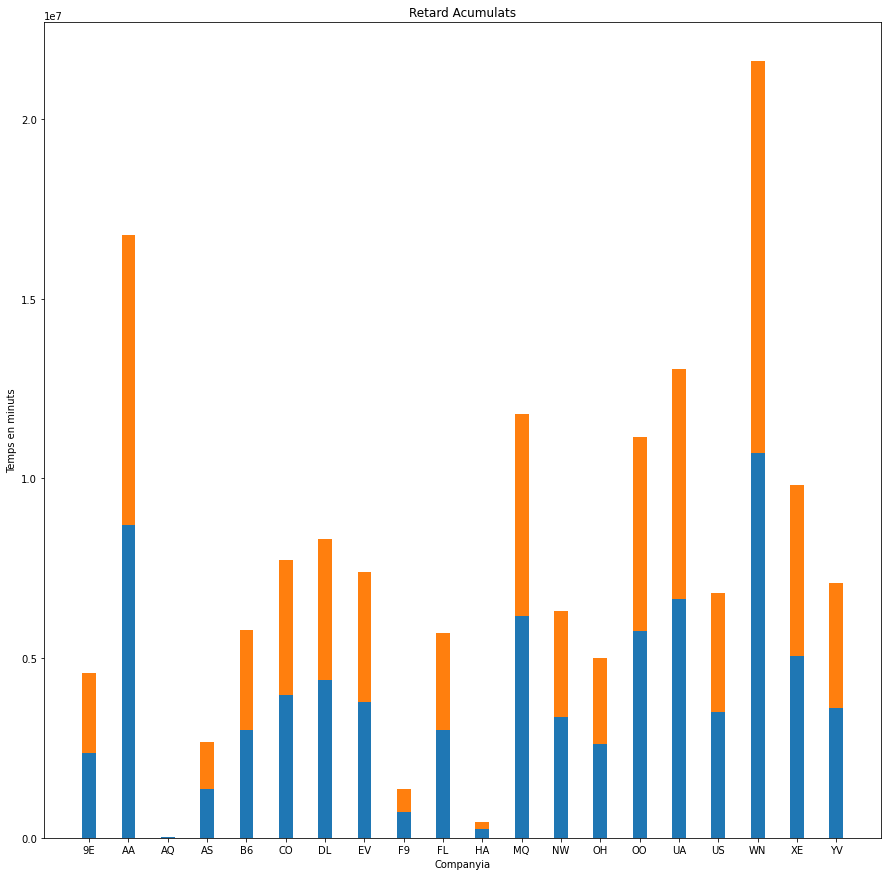

In [62]:
s_1=RR['ArrDelay']
s_2=RR['DepDelay']

plt.bar(etis,s_1,width=0.35)
plt.bar(etis,s_2,width=0.35,bottom=s_1)
plt.ylabel('Temps en minuts')
plt.xlabel('Companyia')
plt.title('Retard Acumulats')
plt.show()

## Més de tres variables 


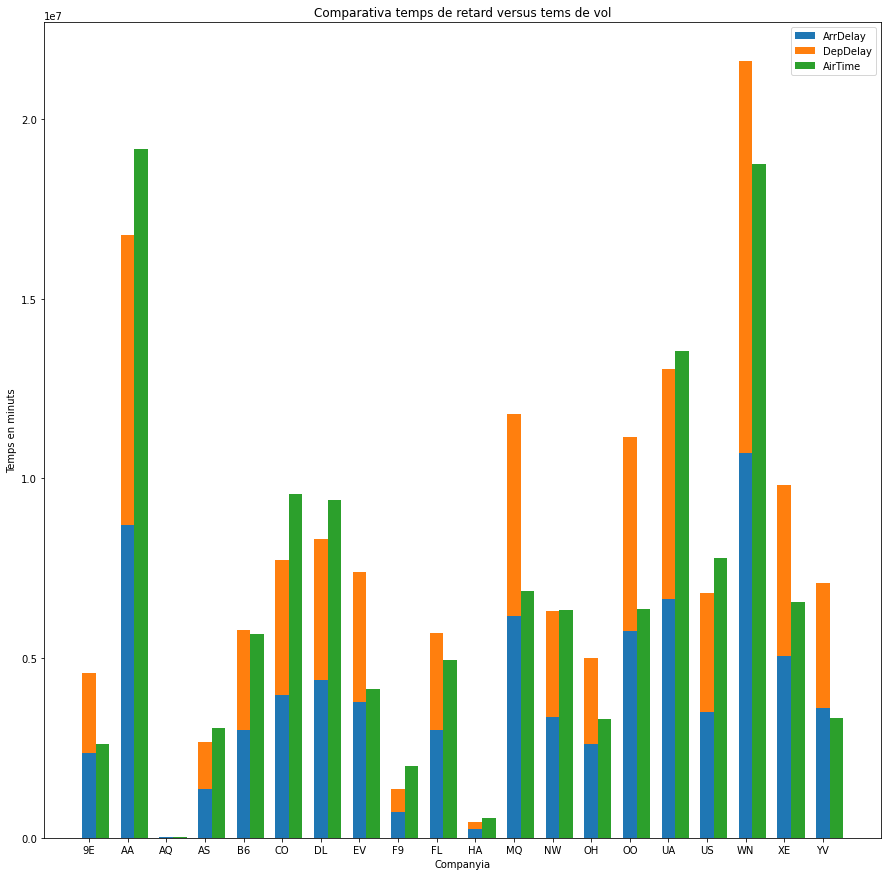

In [63]:
s_1=RR['ArrDelay']
s_2=RR['DepDelay']
s_3=RR['AirTime']
numero_de_grupos = len(s_1)
indice_barras = np.arange(numero_de_grupos)
plt.bar(etis,s_1,width=0.35,label='ArrDelay')
plt.bar(etis,s_2,width=0.35,bottom=s_1,label='DepDelay')
plt.bar(indice_barras+0.35,s_3,width=0.35,label='AirTime')#,bottom=s_1+s_2,label='DepDelay')
plt.legend(loc='best')
plt.ylabel('Temps en minuts')
plt.xlabel('Companyia')
plt.title('Comparativa temps de retard versus tems de vol')
plt.show()

In [64]:
Delayed.to_csv('Delayed_Ampliada.csv')